In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 133M/149M [00:00<00:00, 279MB/s]
100% 149M/149M [00:00<00:00, 270MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)

    df = pd.DataFrame({'Class paths': class_paths, 'Class': classes})

  return df

In [ ]:
tr_df = get_class_paths('/content/Training')
te_df = get_class_paths('/content/Testing')

In [ ]:
tr_df

,Class paths,Class
0,/content/Training/pituitary/Tr-pi_0997.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_1187.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0578.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_0664.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_1219.jpg,pituitary
...,...,...
5707,/content/Training/notumor/Tr-no_0625.jpg,notumor
5708,/content/Training/notumor/Tr-no_0099.jpg,notumor
5709,/content/Training/notumor/Tr-no_0402.jpg,notumor
5710,/content/Training/notumor/Tr-no_1255.jpg,notumor


In [ ]:
te_df

,Class paths,Class
0,/content/Testing/pituitary/Te-pi_0054.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0100.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0049.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0137.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0232.jpg,pituitary
...,...,...
1306,/content/Testing/notumor/Te-no_0022.jpg,notumor
1307,/content/Testing/notumor/Te-no_0036.jpg,notumor
1308,/content/Testing/notumor/Te-no_0159.jpg,notumor
1309,/content/Testing/notumor/Te-no_0328.jpg,notumor


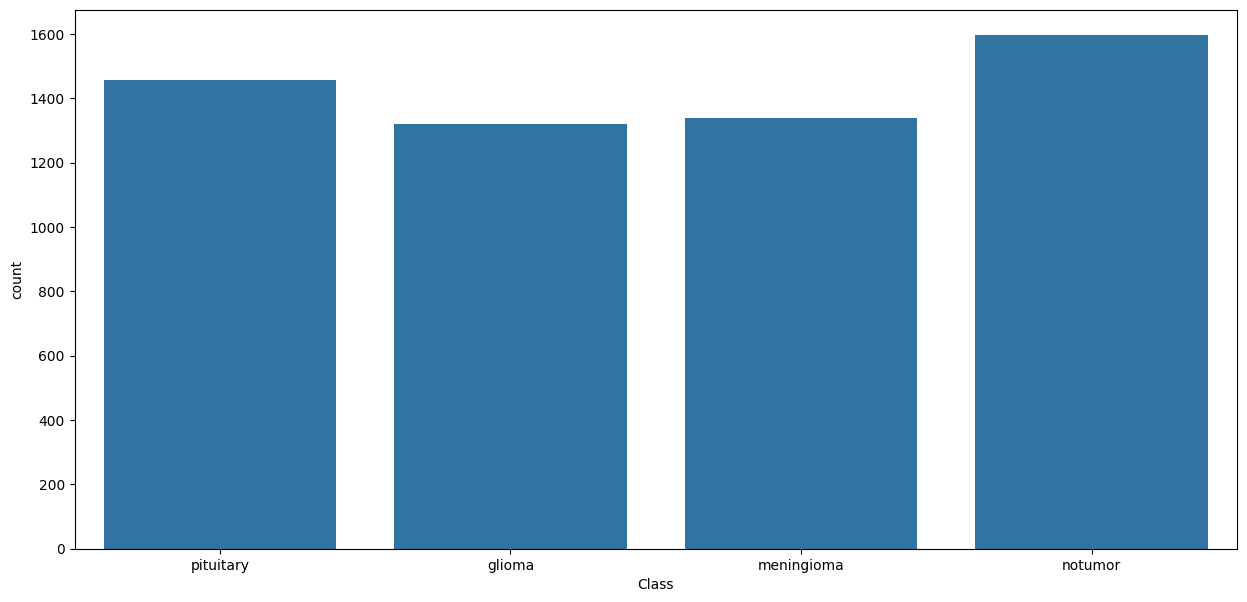

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=tr_df["Class"], data=tr_df)

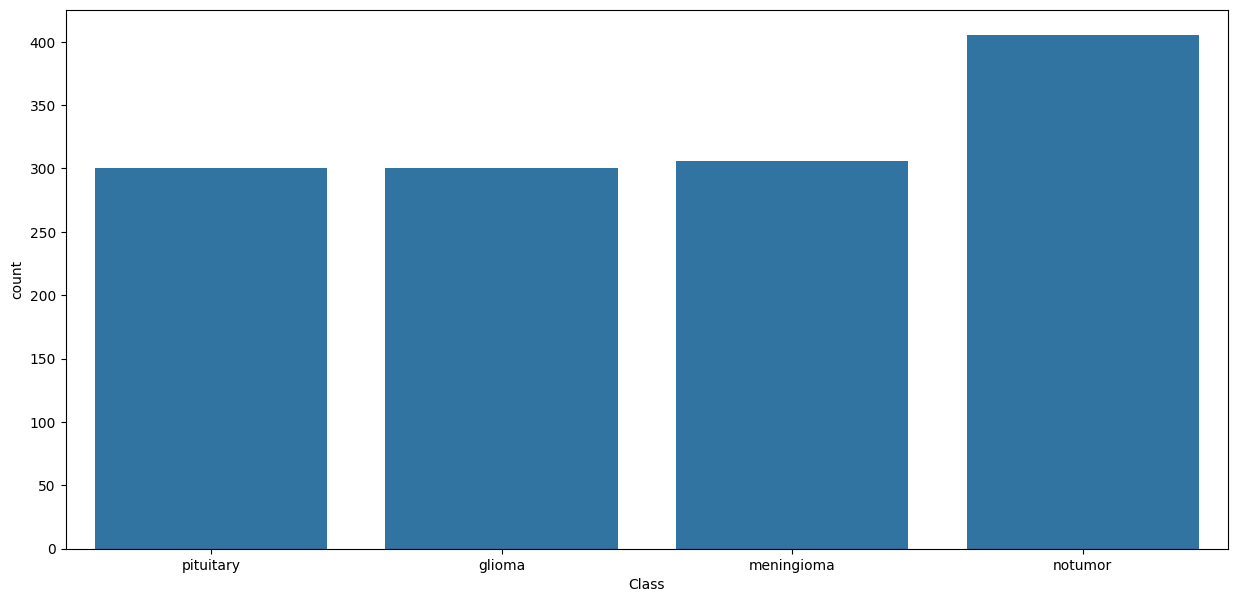

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(x=te_df["Class"], data=te_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall


In [ ]:
val_df, te_df = train_test_split(te_df, train_size=0.5, stratify=te_df['Class'])

In [ ]:
val_df

,Class paths,Class
804,/content/Testing/meningioma/Te-me_0287.jpg,meningioma
923,/content/Testing/notumor/Te-no_0240.jpg,notumor
1259,/content/Testing/notumor/Te-no_0316.jpg,notumor
537,/content/Testing/glioma/Te-gl_0224.jpg,glioma
564,/content/Testing/glioma/Te-gl_0282.jpg,glioma
...,...,...
252,/content/Testing/pituitary/Te-pi_0259.jpg,pituitary
1166,/content/Testing/notumor/Te-no_0353.jpg,notumor
512,/content/Testing/glioma/Te-gl_0098.jpg,glioma
1199,/content/Testing/notumor/Te-no_0100.jpg,notumor


In [ ]:
te_df

,Class paths,Class
861,/content/Testing/meningioma/Te-me_0011.jpg,meningioma
313,/content/Testing/glioma/Te-gl_0200.jpg,glioma
55,/content/Testing/pituitary/Te-pi_0238.jpg,pituitary
629,/content/Testing/meningioma/Te-me_0074.jpg,meningioma
760,/content/Testing/meningioma/Te-me_0183.jpg,meningioma
...,...,...
621,/content/Testing/meningioma/Te-me_0019.jpg,meningioma
876,/content/Testing/meningioma/Te-me_0197.jpg,meningioma
973,/content/Testing/notumor/Te-no_0279.jpg,notumor
792,/content/Testing/meningioma/Te-me_0111.jpg,meningioma


In [ ]:
batch_size = 32
img_size = (299, 299)

image_gen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.8, 1.2),
)

te_gen = ImageDataGenerator(
    rescale=1./255,
)


In [ ]:
tr_gen = image_gen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class paths',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size
)

val_gen = image_gen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Class paths',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size
)

te_gen = te_gen.flow_from_dataframe(
    dataframe=te_df,
    x_col='Class paths',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    shuffle=False
)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


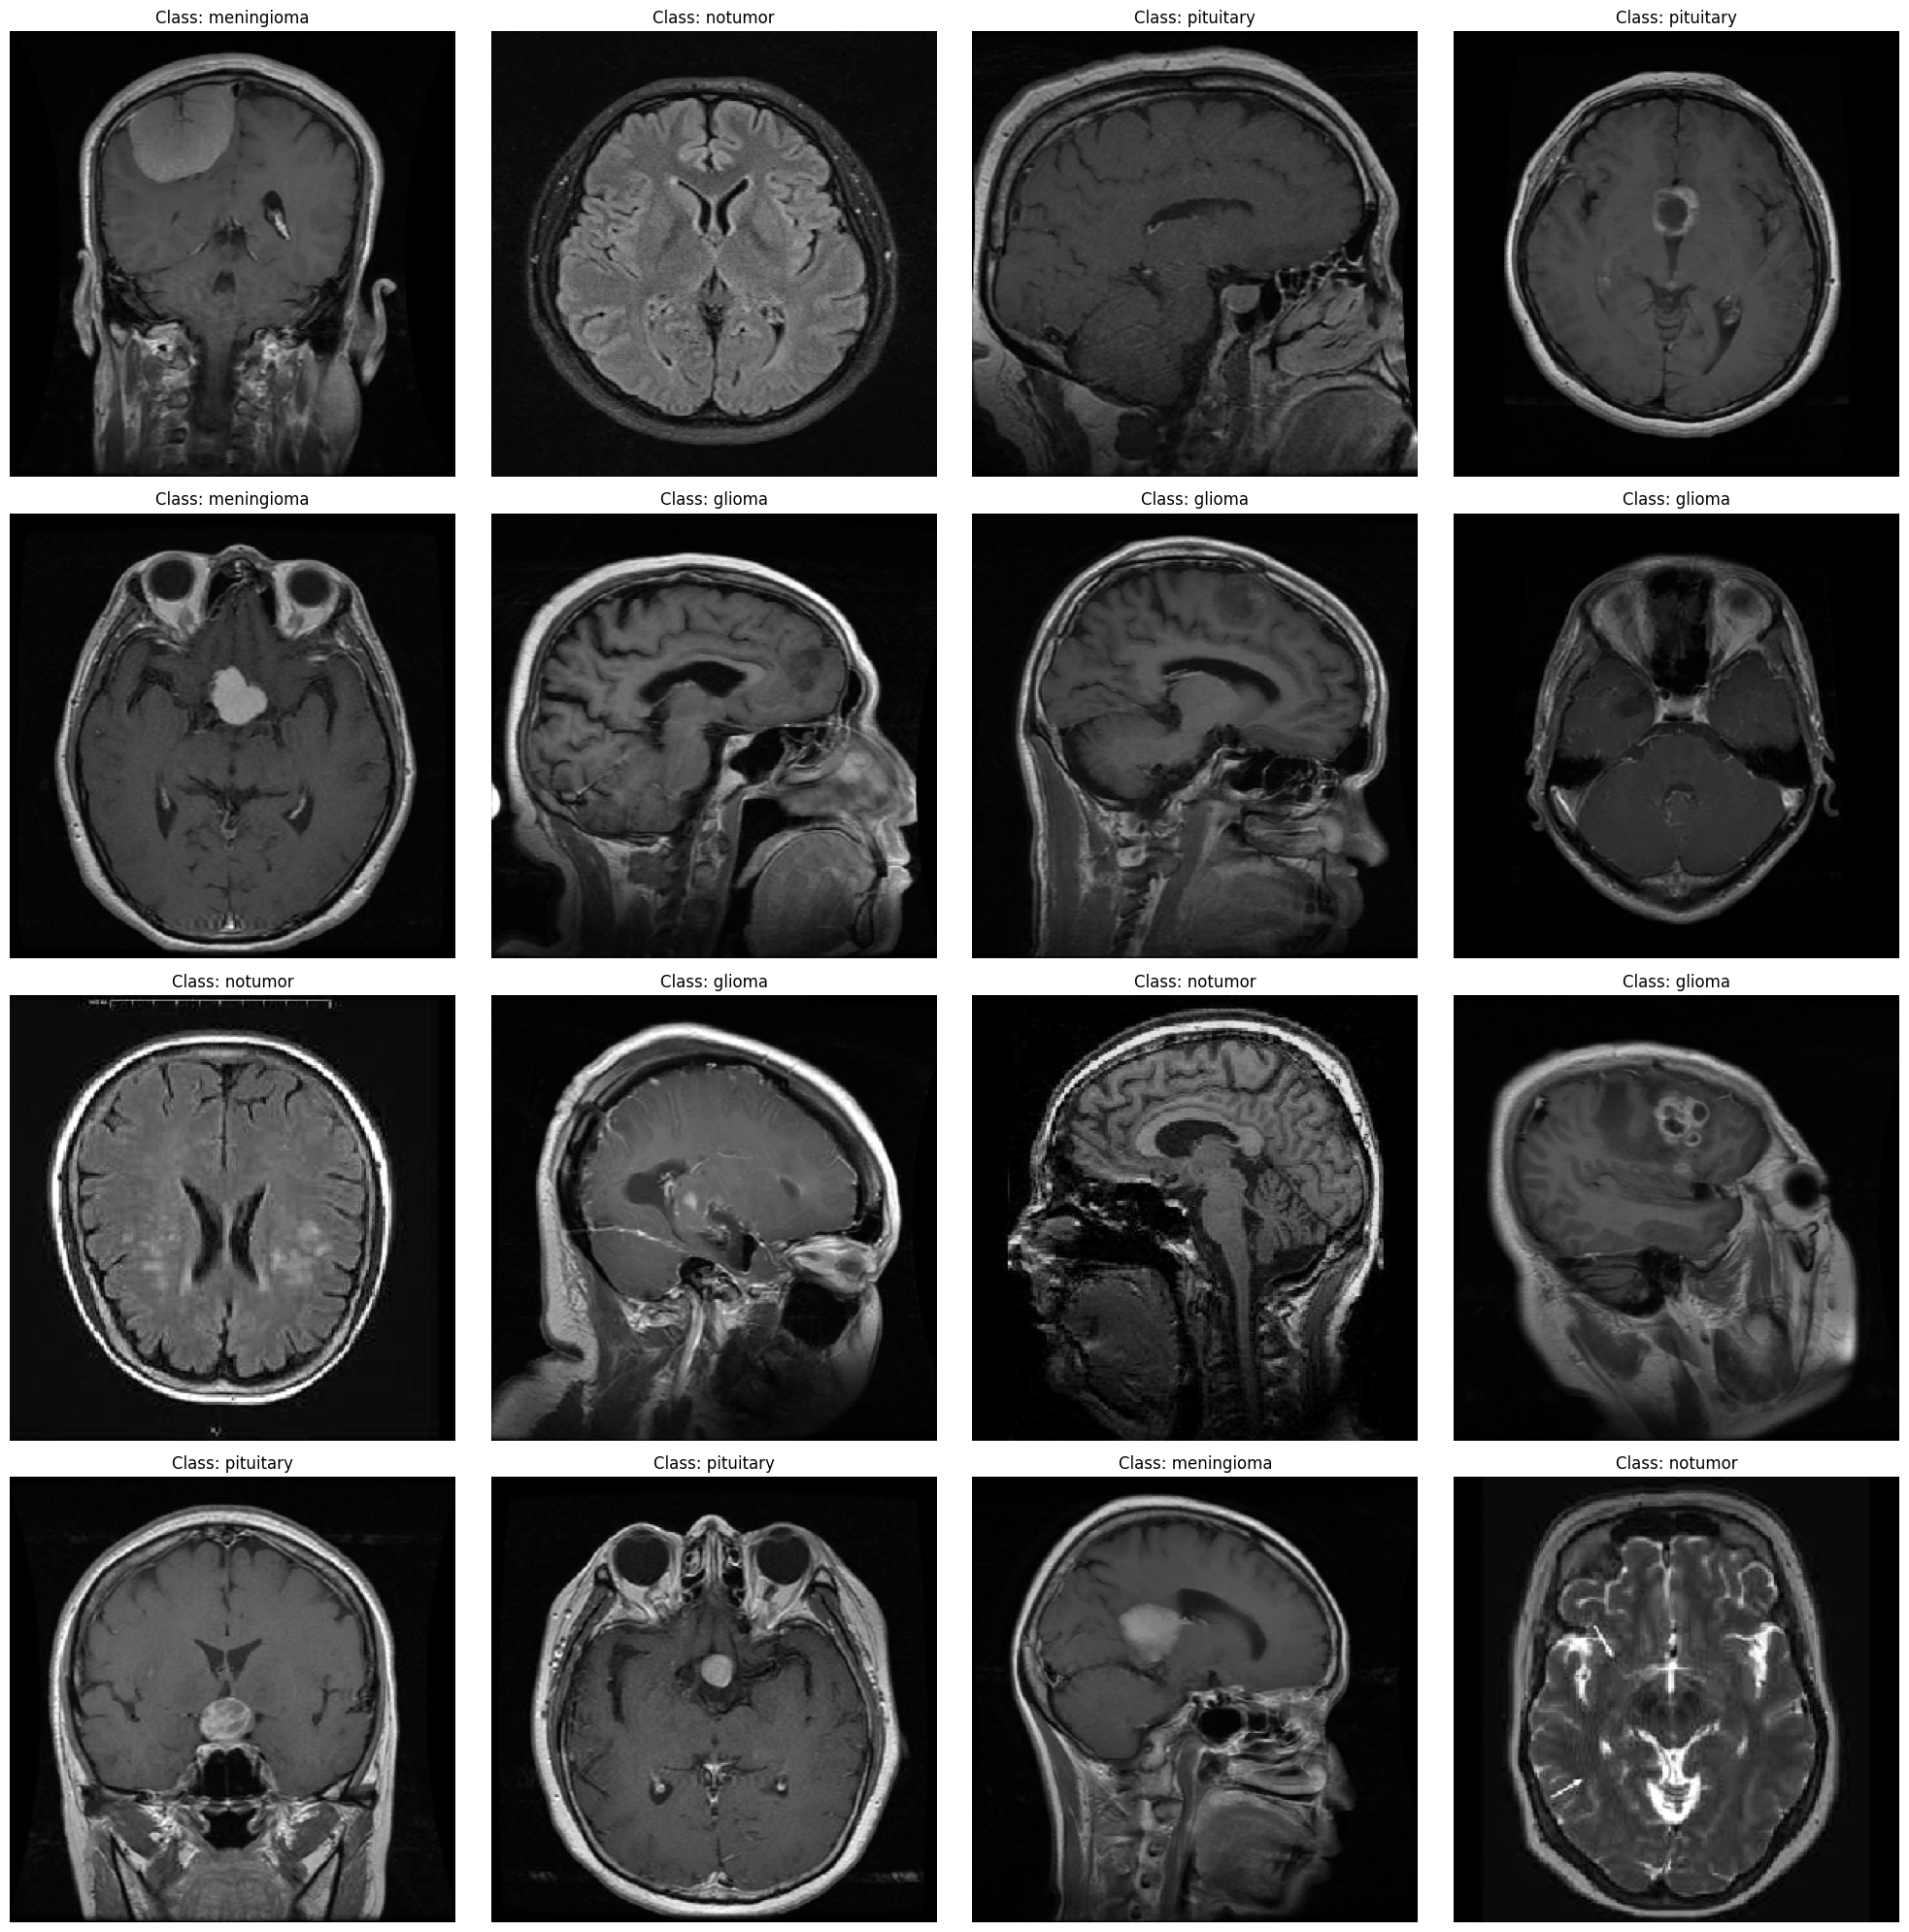

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)
  class_name = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())
  index_position = class_indices.index(class_index)
  class_name = class_name[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

# base_model = tf.keras.applications.Xception(
#     input_shape=img_shape,
#     include_top=False,
#     weights='imagenet',
#     pooling="max"
# )

base_model = tf.keras.applications.ResNet50V2(
    input_shape=img_shape,
    include_top=False,
    weights='imagenet',
    pooling="max"
)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adamax(learning_rate=0.001),
    metrics=['accuracy', Precision(), Recall()]
)

In [ ]:
hist = model.fit(
    tr_gen,
    validation_data=val_gen,
    epochs=5,
)


Epoch 1/5
 82/179 ━━━━━━━━━━━━━━━━━━━━ 1:09:36 43s/step - accuracy: 0.6639 - loss: 4.1168 - precision: 0.6711 - recall: 0.6606

In [ ]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])

  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epoches = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epoches, tr_metrics[metric], "r", label=f"Training {metric}")
  plt.plot(epoches, val_metrics[metric], "g", label=f"Validation {metric}")
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c="blue", label=f"Best epoch: {best_epochs[metric]}")

  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training metrics over epochs", fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
val_score = model.evaluate(val_gen, verbose=1)
test_score = model.evaluate(te_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%\n")
print(f"Train Loss: {train_score[0]:.4f}\n")
print(f"Validation Accuracy: {val_score[1]*100:.2f}%\n")
print(f"Validation Loss: {val_score[0]:.4f}\n")
print(f"Test Accuracy: {test_score[1]*100:.2f}%\n")
print(f"Test Loss: {test_score[0]:.4f}\n")

In [ ]:
preds = model.predict(te_gen)
y_preds = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

cm = confusion_matrix(te_gen.classes, y_preds)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  labels = list(class_dict.keys())
  plt.figure(figsize=(6, 8))

  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize=15)
  plt.title('Class Probabilities')

  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted Tumor type: {predicted_class}")


In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0000.jpg')

In [ ]:
predict('/content/Testing/meningioma/Te-meTr_0005.jpg')

In [ ]:
predict('/content/Testing/glioma/Te-glTr_0000.jpg')


In [ ]:
# model.save_weights("xception_model.weights.h5")
model.save_weights("resNet50V2.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16
img_size = (224, 224)

image_gen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=(0.8, 1.2)
)

te_gen = ImageDataGenerator(
    rescale=1./255,
)

tr_gen = image_gen.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class paths',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size
)

val_gen = image_gen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Class paths',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size
)

te_gen = te_gen.flow_from_dataframe(
    dataframe=te_df,
    x_col='Class paths',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    shuffle=False
)


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3), padding="same"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3), padding="same"))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3), padding="same"))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), padding="same"))
# cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

cnn_model.summary()

In [ ]:
history = cnn_model.fit(
    tr_gen,
    validation_data=val_gen,
    epochs=10
)


In [ ]:
metrics = ["accuracy", "loss", "precision_1", "recall_1"]
print(hist.history.keys())
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])

  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epoches = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epoches, tr_metrics[metric], "r", label=f"Training {metric}")
  plt.plot(epoches, val_metrics[metric], "g", label=f"Validation {metric}")
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c="blue", label=f"Best epoch: {best_epochs[metric]}")

  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training metrics over epochs", fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
val_score = cnn_model.evaluate(val_gen, verbose=1)
test_score = cnn_model.evaluate(te_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%\n")
print(f"Train Loss: {train_score[0]:.4f}\n")
print(f"Validation Accuracy: {val_score[1]*100:.2f}%\n")
print(f"Validation Loss: {val_score[0]:.4f}\n")
print(f"Test Accuracy: {test_score[1]*100:.2f}%\n")
print(f"Test Loss: {test_score[0]:.4f}\n")

In [ ]:
preds = cnn_model.predict(te_gen)
y_preds = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

cm = confusion_matrix(te_gen.classes, y_preds)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(te_gen.classes, y_preds)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")

In [ ]:
!pip install streamlit pyngrok python-dotenv

In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata
import os

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import os
import PIL
from dotenv import load_dotenv

load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = "saliency_maps"
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
  prompt = f"""
  You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituary or no tumor.

  The saliency map highlights the regions of the image that the deep learning model is focusing on to make the prediction.
  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
  - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in the light cyan, those are the regions where the model is focusing on.
  - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan in your explanation.
  - Keep your explanation to 4 sentences max.
  - In case the model prediction is no tumor, verify that if the image is related to an MRI scan of a brain or not. If not, just give a short explanation.
  Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced constrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f"saliency_maps/{uploaded_file.name}"

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img


def load_xception_model(model_path):
  img_shape = (299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling="max")

  xc_model = Sequential()
  xc_model.add(base_model)
  xc_model.add(Flatten())
  xc_model.add(Dropout(rate=0.3))
  xc_model.add(Dense(128, activation="relu"))
  xc_model.add(Dropout(rate=0.25))
  xc_model.add(Dense(4, activation="softmax"))

  xc_model.build((None, ) + img_shape)

  xc_model.compile(Adamax(learning_rate=0.001), loss="catgorical_crossentropy", metrics=["accuracy", Precision(), Recall()])

  xc_model.load_weights(model_path)

  return xc_model

st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify the tumor type.")

uploaded_file = st.file_uploader("Choose an image: ", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

  selected_model = st.radio(
      "Select Model",
      ("Transfer Learning - Xception", "Custom CNN")
  )
  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model("/content/xception_model.weights.h5")
    img_size = (299, 299)
  elif selected_model == "Custom CNN":
    model = load_model("/content/cnn_model.h5")
    img_size = (224, 224)

  labels = ["Glioma tumor", "Meningioma tumor", "No tumor", "Pituitary tumor"]

  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Tumor Type: {result}")
  st.write("Predictions for each class:")

  for label, prob in zip(labels, prediction[0]):
    st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)
  with col2:
    st.image(saliency_map, caption="Saliency Map", use_container_width=True)


  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      """
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
          <div style="display: flex; justify-content: space-between; align-items: center;">
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px">Prediction</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                      {result}
                  </p>
              </div>
              <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px">Confidence</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                      {prediction[0][class_index]:.4f}
                  </p>
              </div>
          </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = [sorted_indices]

  # Create Plotly bar chart
  fig = go.Figure(data=[go.Bar(x=sorted_probabilities, y=sorted_labels, orientation="h", marker_color=["red" if label == result else "blue" for label in sorted_labels])])

  # Customize the chart layout
  fig.update_layout(
      title="Probabilities for each class",
      xaxis_title="Probability",
      yaxis_title="Class",
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f"{prob:.4f}",
        showarrow=False,
        xanchor="left",
        xshift=5,
    )

  # Display the Plotly chart
  st.plotly_chart(fig)
  saliency_map_path = f"saliency_maps/{uploaded_file.name}"
  eplanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])
  st.write("## Explanation")
  st.write(eplanation)





In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL:", public_url)

In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)